# Setup

In [1]:
import matplotlib.pylab as plt
import pandas as pd
import seaborn
import os
import re

# Helpers

In [2]:
def convert_xyz_to_txt(file_path: str):
    """
    Converts file XYZ atomic coordiantes in Angstrom to atomic units
    and writes a new file with the same name but with the suffix extension
    .txt formatted appropriately to be ingestable by moleculeFromTxt

    Parameters
    ----------
    file_path : str
        File path to .xyz file

    Returns
    -------
    None
    """
    output_file_name = "./data/" + os.path.basename(file_path).replace(".xyz", ".txt")

    # Read xyz as a CSV
    df = pd.read_csv(
        filepath_or_buffer=file_path,
        delim_whitespace=True,
        skiprows=range(0, 2),
        names=[
            "atomic symbol",
            "x",
            "y",
            "z",
        ],
        dtype={
            "atomic symbol": str,
            "x": float,
            "y": float,
            "z": float,
        }
    )

    # Convert atomic symbols to atomic numbers
    atmomic_symbol_atmoic_num_map = {
        "H": 1,
        "C": 6,
    }
    df["atomic symbol"] = df["atomic symbol"].apply(lambda x: atmomic_symbol_atmoic_num_map[x])

    # Converrt x, y, and z coordinates to atomic units
    atomic_units_per_angstrom = 1.8897259885789
    df["x"] = df["x"] * atomic_units_per_angstrom
    df["y"] = df["y"] * atomic_units_per_angstrom
    df["z"] = df["z"] * atomic_units_per_angstrom

    # Write to CSV
    df.to_csv(
        path_or_buf=output_file_name,
        sep=" ",
        index=False,
        header=False
    )
    
    # Add header line which number of atoms and charge of molecule
    def line_prepender(file_name, line):
        with open(file_name, 'r+') as f:
            content = f.read()
            f.seek(0, 0)
            f.write(line.rstrip('\r\n') + '\n' + content)
    header_line = open(file_path).readline().replace('\n', '') + " 0"   # Assumes charge is zero
    line_prepender(output_file_name, header_line)
    
    print(f"output: {output_file_name}")

## DIIS and Fixed Point Iteration Comparison

Convert xyz files to txt

In [3]:
input_mol_xyz_files = [
    "Cyclopropane.xyz",
    "Cyclobutane.xyz",
    "Cyclopentane.xyz",
    "Cyclohexane.xyz",
    "Cycloheptane.xyz",
    "Cyclooctane.xyz",
    "Cyclononane.xyz",
    "Cyclodecane.xyz",
    "Cyclopentacontane.xyz",
    "Cyclohectane.xyz",
]
for input_xyz_file in input_mol_xyz_files:
    convert_xyz_to_txt(f"./data/Jmol_export_xyz/{input_xyz_file}")

output: ./data/Cyclopropane.txt
output: ./data/Cyclobutane.txt
output: ./data/Cyclopentane.txt
output: ./data/Cyclohexane.txt
output: ./data/Cycloheptane.txt
output: ./data/Cyclooctane.txt
output: ./data/Cyclononane.txt
output: ./data/Cyclodecane.txt
output: ./data/Cyclopentacontane.txt
output: ./data/Cyclohectane.txt


Run SCF for each

In [7]:
input_mol_txt_file_and_params = [    
    ("./data/Cyclopropane.txt", 9, 9, "fixedPointIteration", 3),
    ("./data/Cyclobutane.txt", 12, 12, "fixedPointIteration", 4),
    ("./data/Cyclopentane.txt", 15, 15, "fixedPointIteration", 5),
    ("./data/Cyclohexane.txt", 18, 18, "fixedPointIteration", 6),
    ("./data/Cycloheptane.txt", 21, 21, "fixedPointIteration", 7),
    ("./data/Cyclooctane.txt", 24, 24, "fixedPointIteration", 8),
    ("./data/Cyclononane.txt", 27, 27, "fixedPointIteration", 9),
    ("./data/Cyclodecane.txt", 30, 30, "fixedPointIteration", 10),
#     ("./data/Cyclopentacontane.txt", 150, 150, "fixedPointIteration", 50),
#     ("./data/Cyclohectane.txt", 300, 300, "fixedPointIteration", 100),
    
    ("./data/Cyclopropane.txt", 9, 9, "DIIS", 3),
    ("./data/Cyclobutane.txt", 12, 12, "DIIS", 4),
    ("./data/Cyclopentane.txt", 15, 15, "DIIS", 5),
    ("./data/Cyclohexane.txt", 18, 18, "DIIS", 6),
    ("./data/Cycloheptane.txt", 21, 21, "DIIS", 7),
    ("./data/Cyclooctane.txt", 24, 24, "DIIS", 8),
    ("./data/Cyclononane.txt", 27, 27, "DIIS", 9),
    ("./data/Cyclodecane.txt", 30, 30, "DIIS", 10),
#     ("./data/Cyclopentacontane.txt", 150, 150, "DIIS", 50),
#     ("./data/Cyclohectane.txt", 300, 300, "DIIS", 100),
]
dicts = []
for input_txt_file_and_param in input_mol_txt_file_and_params:
    input_txt_file, p, q, scfAlgo, num_carbons = input_txt_file_and_param
    executeable_command = f"./moleculeGeometryOptimizer {input_txt_file} {p} {q} {scfAlgo} true"
    print(executeable_command)
    output = os.popen(executeable_command).read()
    m = re.search(
        pattern=r"SCF\siteration\scount\:\s(?P<scf_iter_count>\d+)",
        string=output
    )
    dicts.append(
        {
            "scf_iter_count": m.groupdict()["scf_iter_count"], 
            "type": scfAlgo,
            "molecule": os.path.basename(input_txt_file).split(".")[0],
            "num_carbons": num_carbons,
        }
    )

df = pd.DataFrame(data=dicts).astype(dtype={"scf_iter_count": int, "type": str})
df

./moleculeGeometryOptimizer ./data/Cyclopropane.txt 9 9 fixedPointIteration true
./moleculeGeometryOptimizer ./data/Cyclobutane.txt 12 12 fixedPointIteration true
./moleculeGeometryOptimizer ./data/Cyclopentane.txt 15 15 fixedPointIteration true
./moleculeGeometryOptimizer ./data/Cyclohexane.txt 18 18 fixedPointIteration true
./moleculeGeometryOptimizer ./data/Cycloheptane.txt 21 21 fixedPointIteration true
./moleculeGeometryOptimizer ./data/Cyclooctane.txt 24 24 fixedPointIteration true
./moleculeGeometryOptimizer ./data/Cyclononane.txt 27 27 fixedPointIteration true
./moleculeGeometryOptimizer ./data/Cyclodecane.txt 30 30 fixedPointIteration true
./moleculeGeometryOptimizer ./data/Cyclopropane.txt 9 9 DIIS true
./moleculeGeometryOptimizer ./data/Cyclobutane.txt 12 12 DIIS true
./moleculeGeometryOptimizer ./data/Cyclopentane.txt 15 15 DIIS true
./moleculeGeometryOptimizer ./data/Cyclohexane.txt 18 18 DIIS true
./moleculeGeometryOptimizer ./data/Cycloheptane.txt 21 21 DIIS true
./molec

,scf_iter_count,type,molecule,num_carbons
0,14,fixedPointIteration,Cyclopropane,3
1,17,fixedPointIteration,Cyclobutane,4
2,16,fixedPointIteration,Cyclopentane,5
3,16,fixedPointIteration,Cyclohexane,6
4,15,fixedPointIteration,Cycloheptane,7
5,16,fixedPointIteration,Cyclooctane,8
6,300,fixedPointIteration,Cyclononane,9
7,17,fixedPointIteration,Cyclodecane,10
8,7,DIIS,Cyclopropane,3
9,8,DIIS,Cyclobutane,4


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Cyclopropane'),
  Text(1, 0, 'Cyclobutane'),
  Text(2, 0, 'Cyclopentane'),
  Text(3, 0, 'Cyclohexane'),
  Text(4, 0, 'Cycloheptane'),
  Text(5, 0, 'Cyclooctane'),
  Text(6, 0, 'Cyclononane'),
  Text(7, 0, 'Cyclodecane')])

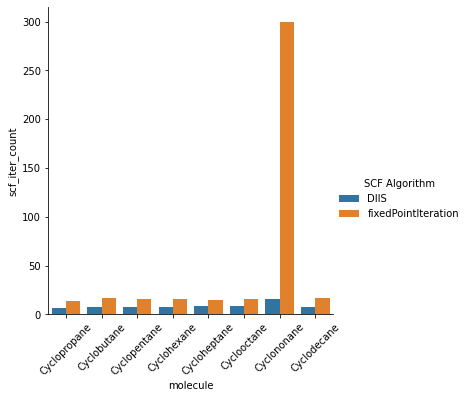

In [5]:
facet_grid = seaborn.catplot(
    data=df, 
    kind="bar",
    x="molecule", 
    y="scf_iter_count", 
    hue="type"
)
facet_grid.set_axis_labels(x_label="molecule", y_label="iteration count")
facet_grid.legend.set_title("SCF Algorithm")
plt.xticks(rotation=45)

# ScratchWork

In [ ]:
r"iterationCount\:\s(?P<opt_iter_count>\d+)""

In [ ]:
r"SCF iteration count\:\s(?P<scf_iter_count>\d+)"

In [ ]:
s = """./moleculeGeometryOptimizer ./data/Cyclodecane.txt 30 30 DIIS
Hello World! Running geometry optimization on input file ./data/Cyclodecane.txt
Nuclear Repulsion Energy: 9055.5 eV
Electronic energy: -11480.4 eV
Total energy: -2424.89 eV
SCF iteration count: 8"""
m = re.search(
        pattern=r"SCF\siteration\scount\:\s(?P<scf_iter_count>\d+)",
        string=s
    )
m

In [ ]:
m.groupdict()